# Initial basement setting

k ——>  0
k ——>  50
k ——>  100
k ——>  150


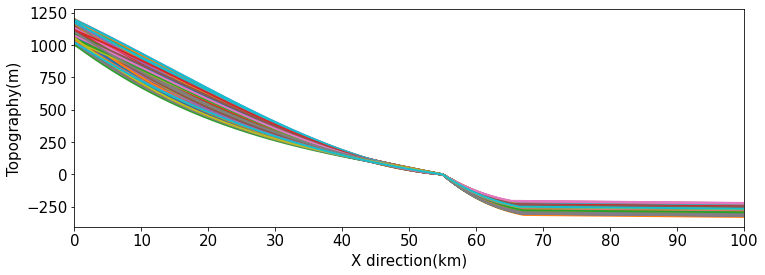

In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

def discrete_point_interp_1D(points, values, inshape_range, inv=0.25, method='linear'):
    grid_x = np.meshgrid(np.arange(inshape_range[0], inshape_range[1], inv))
    grid_img = griddata(points, values, grid_x,method=method)  # method <linear、cubic、nearest>
    return grid_img

plt.figure(figsize=(12,4))
plt.xlim(0,100000)
for k in range(200):
    if(k%50==0):
        print("k ——> ",k)
    dx=100
    dy=100
    xmax = 100000
    ymax = 40000

    # the mountain height
    ym = int(round(random.uniform(1000,1200),0)) # mountain height——>(2000,3000)
    # the shelf location
    x1 = round(random.uniform(650,670),0)*100 
    y1 = -1*(x1-55000)*random.uniform(0.02,0.026) # 250m ~ 360m
    # the shelf angle location
    x0 = (x1+55000)*0.7
    slp = round(random.uniform(0.7,0.85),2)
    y0 = slp * y1
    
    x00 = 55000*0.3
    ss = round(random.uniform(0.5,0.65),3)
    y00 = ss * ym
    x01 = 55000*0.8
    y01 = 0.1 * ym
    # the shelf location +1
    x2 = x1 + dx
    y2 = y1 - 1
    # the final location
    y3 = y1 - (xmax - x2)/2000
    
    x = np.array([0,x00,x01,55000,x0,x1,x2,xmax])
    depth = np.array([ym,y00,y01,0,y0,y1,y2,y3])

    x_1 = x[0:4] # interpolate the mountain using the linear method
    dep_1 = depth[0:4]
    x_1_range = [0,55000+dx]
    basement1 = discrete_point_interp_1D(x_1,dep_1,x_1_range,inv=dx,method = "cubic")
    x_2 = x[3:-1] # interpolate the clinoform part using the cubic method
    dep_2 = depth[3:-1]
    x_2_range = [55000,x2+1]
    basement2 = discrete_point_interp_1D(x_2,dep_2,x_2_range,inv=dx,method = "cubic")
    x_3 = x[-2:] # interpolate the last part using the linear method
    dep_3 = depth[-2:]
    x_3_range = [x2,xmax+1]
    basement3 = discrete_point_interp_1D(x_3,dep_3,x_3_range,inv=dx,method = "linear")

    basement=np.append(basement1[0],basement2[0][1:])
    basement=np.append(basement,basement3[0][1:])

    x = np.linspace(0,xmax,int(xmax/dx)+1)
    plt.plot(x,basement,lw=2)
    plt.xticks([0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000],[0,10,20,30,40,50,60,70,80,90,100],fontsize=15)
    plt.yticks([-250,0,250,500,750,1000,1250],fontsize=15)
    plt.xlabel("X direction(km)",fontsize=15)
    plt.ylabel("Topography(m)",fontsize=15)
    X = np.linspace(0,xmax,int(xmax/dx)+1)
    Y = np.linspace(0,0,int(xmax/dx)+1)
    Base = basement.view()

    for ip in range(1,int(ymax/dy)+1):
        yi = np.linspace(dx*ip,dx*ip,int(xmax/dx)+1)
        X = np.append(X,x)
        Y = np.append(Y,yi)
        Base = np.append(Base,basement)
    xyz=np.concatenate((X,Y,Base)).reshape(3,(int(ymax/dy)+1)*len(basement)).T
    
    np.savetxt('./Inputs/Topography/node'+str(k)+'.csv',xyz)
    

# Thermal Subsidence setting

0
10
20
30
40


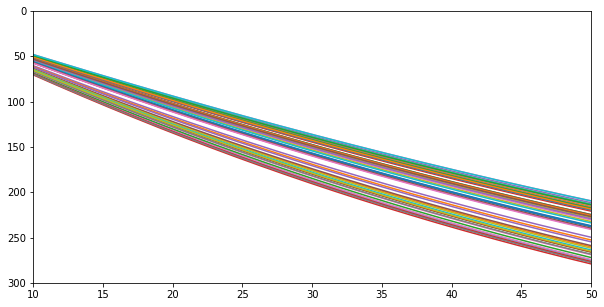

In [64]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

plt.figure(figsize=(10,5))
for ip in range(50):
    if(ip%10==0):
        print(ip)
    E0 = 3200.0  # m
    tao = 62.8e6  # yr
    dist = np.linspace(0,55,551)
    T=200
    aa = round(random.uniform(80,120),2)
    beta = 1.0/aa*dist+1
    r = (beta/np.pi)*np.sin(np.pi/beta)
    subsidence = (E0*r*np.exp(0/tao) - E0*r*np.exp(-1*T*100000/tao))*2/3
    
    f = open("./Inputs/Thermal-subsidence/thermsub"+str(ip)+".csv", "w")
    for j in range(0,401):
        for i in range(0,450):
            uplift = 600 - 6.7*(math.e**(i/100)) # uplift setting
            f.write( str(uplift) + "\n"  )
        for i in range(450,1001):
            f.write( str(-subsidence[i-450]) + "\n"  ) # to 40km
    f.close()
    plt.plot(dist,subsidence)
    plt.xlim(10, 50)
    plt.ylim(300, 0)

# Sea-level curves setting

ip—>  900


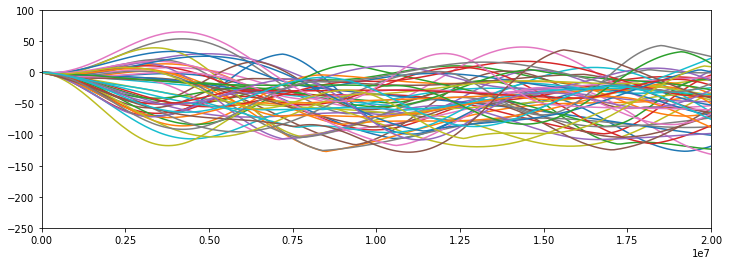

In [6]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def buildonecurve(timeperiod=None,timestep= None,seaExt = None, ampExt = None,):
    dt = float(timestep)
    to = float(0.)
    tm = float(timeperiod)+dt
    so = float(seaExt[0])
    sm = float(seaExt[1])
    Ao = float(ampExt[0])
    Am = float(ampExt[1])
    time = np.arange(to,tm,dt,dtype=np.float32)
    a0 = (sm - so)/tm
    b0 = so
    sl = a0 * time + b0
    a1 = (Am - Ao)/tm
    b1 = Ao
    A = a1 * time + b1
    P = 0 * time + timeperiod
    for t in range(len(time)):
        sl[t] += A[t] * np.cos(2.* np.pi * time[t] / P[t])
    return time,sl,len(time)

plt.figure(figsize=(12,4))
for ip in range(1000):
    if(ip%100==0):
        print("ip—> ",ip)
    ln = 0
    for i in range(5):
        if(i==0):
            T = round(random.uniform(50,150),0)*100000
            a0 = round(random.uniform(-50,50),0)
            s0 = -a0
            a1 = a0
            s1 = round(random.uniform(-100,0),0)
            time,sl,length = buildonecurve(timeperiod=T, timestep = 100000., seaExt = [s0,s1], ampExt = [a0,a1])
            tt = time 
            ss = sl
            ln = ln + length
        else:
            T = round(random.uniform(50,150),0)*100000
            if(a1>0):
                a0 = round(random.uniform(-25,50),0)
            else:
                a0 = round(random.uniform(-50,25),0)    
            s0 = s1+a1-a0  
            a1 = a0
            s1 = round(random.uniform(0,-100),0)
            time,sl,length = buildonecurve(timeperiod=T,timestep = 100000., seaExt = [s0,s1], ampExt = [a0,a1])
            time = time + ((ln-1) * 100000)
            tt = np.hstack((tt,time[1:]))
            ss = np.hstack((ss,sl[1:]))
            ln = ln + length-1
        if(ln > 201):
            break
    plt.plot(tt[0:201],ss[0:201])
    plt.xlim(0,20000000)
    plt.ylim(-250,100)
    df = pd.DataFrame({'X':np.around(tt[0:201], decimals=0),'Y':np.around(ss[0:201], decimals=3)})
    df.to_csv("./Inputss/Sealevel/sealevel"+str(ip)+".csv",columns = ['X','Y'],sep=' ',index=False,header=0)

# Randomly combine the inputs

In [3]:
import os,sys
def mkdir(path):
    import os
    path=path.strip()
    path=path.rstrip("\\")
    isExists=os.path.exists(path)
    if not isExists:
        os.makedirs(path) 
        print(path + '---Create successful')
        return True
    else:
        print(path+'---The folder exiting')
        return False
for i in range(1000):
    mkpath = "./Inputs/Models/inputs/demo"+str(i)
    mkdir(mkpath)

./Inputs/Models/inputs/demo0---Create successful


In [ ]:
import random
from shutil import copy
for i in range(1000):
    if(i%100==0):
        print("i ——> ",i)
    file_path="./"
    n1 = int(random.uniform(0,200))
#     n2 = int(random.uniform(0,1000))
    n3 = int(random.uniform(0,50))
    file_name1 = "Inputs/Topography/node"+str(n1)+".csv"
    file_name2 = "Inputs/Sealevel/sealevel"+str(i)+".csv"
    file_name3 = "Inputs/Thermal-subsidence/thermsub"+str(n3)+".csv"
    
    save_path = "./Inputs/Models/inputs/demo"+str(i)+"/"
    save_name1 = "node.csv"
    save_name2 = "sealevel.csv"
    save_name3 = "thermsub.csv"
    
    from_path_node = os.path.join(file_path,file_name1)
    from_path_sea = os.path.join(file_path,file_name2)
    from_path_the = os.path.join(file_path,file_name3)
    to_path_node = save_path + save_name1
    to_path_sea = save_path + save_name2
    to_path_the = save_path + save_name3
    
    copy(from_path_node,to_path_node)
    copy(from_path_sea,to_path_sea)
    copy(from_path_the,to_path_the)

# .xml files setting

In [ ]:
import random
from xml.etree.ElementTree import Element
import xml.etree.ElementTree as ET
import os

def __indent(elem, level=0):
    i = "\n" + level*"\t"
    if len(elem):
        if not elem.text or not elem.text.strip():
            elem.text = i + "\t"
        if not elem.tail or not elem.tail.strip():
            elem.tail = i
        for elem in elem:
            __indent(elem, level+1)
        if not elem.tail or not elem.tail.strip():
            elem.tail = i
    else:
        if level and (not elem.tail or not elem.tail.strip()):
            elem.tail = i

def change_xml(xml_path,save_path,file_num,rain_num,raintime):
    doc = ET.parse(xml_path)
    root = doc.getroot()
    badlands = root.find('badlands')
    # node dir
    grid = root.find('grid')
    demfile = grid.find("demfile")
    demfile.text="Inputs/Models/inputs/demo"+str(file_num)+"/node.csv"
    # sealevel dir
    sea = root.find('sea')
    curve = sea.find("curve")
    curve.text = "Inputs/Models/inputs/demo"+str(file_num)+"/sealevel.csv"
    # thermsub dir 
    tect = root.find('tectonic')
    disp = tect.find('disp')
    dfile = disp.find('dfile')
    dfile.text = 'Inputs/Models/inputs/demo'+str(file_num)+"/thermsub.csv"
    # output dir
    outfile = root.find('outfolder')
    outfile.text="Inputs/Models/results/demo"+str(file_num)+ "_output"
    
    prec = root.find('precipitation')
    climate = prec.find('climates')
    climate.text = str(rain_num)
    rain = prec.find('rain')
    prec.remove(rain)
    
    for i in range(rain_num):
        rain_i=Element('rain')
        rstart_i=Element('rstart')
        rstart_i.text = str(raintime[i])
        rain_i.append(rstart_i)
        
        rend_i=Element('rend')
        rend_i.text = str(raintime[i+1])
        rain_i.append(rend_i)
        
        rval_i=Element('rval')
        rainfall_i=int(random.uniform(2,8))*0.5
        rval_i.text = str(rainfall_i)
        rain_i.append(rval_i)
        
        prec.append(rain_i)
    # save
    __indent(root)
    doc.write(save_path,encoding='utf-8',xml_declaration=True)  # save

for i in range(1000):
    if(i%100==0):
        print("i ——> ",i)
    xml_path = './Inputs/Models/basin_demo.xml'
    save_path = './Inputs/Models/xmldirs/basin_demo'+str(i)+'.xml'
    rain_number = int(random.uniform(1,5))
#     print(rain_number)
    raintime = []
    raintime.append(0.0)
    times = random.sample(range(1,199),rain_number-1)
    for ip in range(rain_number-1):
        times[ip] = times[ip]*100000.
        raintime.append(times[ip])
    raintime.append(20000000.0)
    raintime.sort()
    change_xml(xml_path,save_path,i,rain_number,raintime)